# New York City Taxi Rides 2021 - Group 14

## 1. Importing libraries

In [ ]:
import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#from shapely.geometry import Polygon, Point    # geospatial taxi_data analysis

import warnings
warnings.filterwarnings(action='ignore')
plt.style.use('fivethirtyeight')

## 1. Data Collection

### Importing the taxi_dataset

In [ ]:
full_taxi = pd.read_csv("gs://my_data1004/Yellow_Taxi_Trip_Data.csv")

### Randomly select half(15,452,036) of the data

In [ ]:
# Limit the DataFrame and save directly to a CSV file
taxi_data = full_taxi.sample(n=15452036, random_state=42)

# Save the subset DataFrame
taxi_data.to_csv('gs://my_data1004/random_subset.csv', index=False)

## 2. Exploration

### First look on taxi_data

In [ ]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
18008436,2.0,09/03/2021 04:19:01 PM,09/03/2021 04:24:49 PM,1.0,1.18,1.0,N,137,233,1.0,6.0,1.0,0.5,2.06,0.0,0.3,12.36,2.5
20702075,2.0,09/19/2021 02:30:41 AM,09/19/2021 02:42:43 AM,NaN,2.14,NaN,NaN,249,137,0.0,13.2,0.0,0.5,3.5,0.0,0.3,20.0,NaN
2927919,1.0,03/04/2021 12:21:53 PM,03/04/2021 12:29:15 PM,1.0,0.8,1.0,N,237,236,1.0,6.5,2.5,0.5,1.95,0.0,0.3,11.75,2.5
17638612,2.0,08/31/2021 08:24:44 PM,08/31/2021 08:52:47 PM,1.0,8,1.0,N,246,24,1.0,27.5,0.5,0.5,9.39,0.0,0.3,40.69,2.5
18100178,2.0,09/04/2021 05:35:08 PM,09/04/2021 05:42:39 PM,1.0,1.04,1.0,N,170,234,1.0,7.0,0.0,0.5,2.58,0.0,0.3,12.88,2.5


In [ ]:
taxi_data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
16199251,2.0,08/14/2021 06:59:47 PM,08/14/2021 07:18:13 PM,1.0,10.29,1.0,N,163,220,1.0,30.5,0.0,0.5,7.36,3.0,0.3,44.16,2.5
20640826,6.0,09/06/2021 06:09:23 PM,09/06/2021 06:09:30 PM,NaN,2.33,NaN,NaN,265,210,0.0,29.2,0.0,0.5,0.0,0.0,0.3,30.0,NaN
15235240,2.0,08/03/2021 10:29:30 PM,08/03/2021 10:41:30 PM,1.0,2.47,1.0,N,230,239,1.0,11.0,0.5,0.5,3.7,0.0,0.3,18.5,2.5
13213880,2.0,07/13/2021 07:09:02 PM,07/13/2021 07:18:21 PM,1.0,1.39,1.0,N,224,170,1.0,8.0,1.0,0.5,1.7,0.0,0.3,14.0,2.5
18088433,1.0,09/04/2021 03:34:24 PM,09/04/2021 03:50:27 PM,1.0,2.9,1.0,N,239,170,1.0,13.5,2.5,0.5,3.35,0.0,0.3,20.15,2.5


In [ ]:
taxi_data.shape

(15452036, 18)

Totally our dataset has 30,904,072 rides with 18 columns. It is hard to manage large data due to limited resources. So we only used randomly selected data from the main dataset, which is 15,452,036 records.





In [ ]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15452036 entries, 18008436 to 18088433
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          object 
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            object 
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             object 
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           object 
 17  congestion_surcharge   float64
dtypes: float64(9), int64(2), object(7)
memory usage: 2.2+ GB


Let's check the taxi_data files! According the taxi_data description we should find the following columns:

In [ ]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

### Find the missing values

In [ ]:
taxi_data.isna().sum()

VendorID                 416156
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          738498
trip_distance                 0
RatecodeID               738498
store_and_fwd_flag       738498
PULocationID                  0
DOLocationID                  0
payment_type             416156
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     322342
dtype: int64

In [ ]:
# Create a dictionary of column name mappings
column_mappings = {'VendorID': 'vendor_id', 'tpep_pickup_datetime': 'pickup_datetime', 'tpep_dropoff_datetime': 'dropoff_datetime'}

# Rename the columns using the dictionary
taxi_data = taxi_data.rename(columns=column_mappings)
taxi_data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
18008436,2.0,09/03/2021 04:19:01 PM,09/03/2021 04:24:49 PM,1.0,1.18,1.0,N,137,233,1.0,6.0,1.0,0.5,2.06,0.0,0.3,12.36,2.5
20702075,2.0,09/19/2021 02:30:41 AM,09/19/2021 02:42:43 AM,NaN,2.14,NaN,NaN,249,137,0.0,13.2,0.0,0.5,3.5,0.0,0.3,20.0,NaN
2927919,1.0,03/04/2021 12:21:53 PM,03/04/2021 12:29:15 PM,1.0,0.8,1.0,N,237,236,1.0,6.5,2.5,0.5,1.95,0.0,0.3,11.75,2.5
17638612,2.0,08/31/2021 08:24:44 PM,08/31/2021 08:52:47 PM,1.0,8,1.0,N,246,24,1.0,27.5,0.5,0.5,9.39,0.0,0.3,40.69,2.5
18100178,2.0,09/04/2021 05:35:08 PM,09/04/2021 05:42:39 PM,1.0,1.04,1.0,N,170,234,1.0,7.0,0.0,0.5,2.58,0.0,0.3,12.88,2.5


Lets see what each column mean

- vendor_id - A code indicating the TPEP provider that provided the record.  
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- trip_distance - The elapsed trip distance in miles reported by the taximeter.
- RatecodeID - The final rate code in effect at the end of the trip.
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
- PULocationID - TLC Taxi Zone in which the taximeter was engaged.
- DOLocationID - TLC Taxi Zone in which the taximeter was disengaged.
- payment_type - A numeric code signifying how the passenger paid for the trip.
- fare_amount - The time-and-distance fare calculated by the meter.
- extra - Miscellaneous extras and surcharges.  Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
- mta_tax - $0.50 MTA tax that is automatically triggered based on the metered rate in use.
- tip_amount - This field is automatically populated for credit card tips. Cash tips are not included.

- tolls_amount - Total amount of all tolls paid in trip.
- improvement_surcharge - $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
- total_amount - The total amount charged to passengers. Does not include cash tips.
- congestion_surcharge - The Tax Law imposes a surcharge that is added to the charge for transportation that both begins and ends in New York State, and that begins in, ends in, or passes through the area of New York City in the borough of Manhattan, south of and excluding 96th Street.


In [ ]:
taxi_data.describe()

- **vendor_id**  -  vendor_id is a categorical variable with only 2 values (0 and 1).
- **passenger_count**   -   Its range is from 0 to 9. Minimum value looks fishy. It can be a outlier and need to handle it.
- **RatecodeID** - Its range is from 0 to 6. So need to handle it too.
- **payment_type** - Its range is from 0 to 6. So need to handle it too.
- **trip_duration**  -  Minimum trip duration is 1 second, those trips are going nowhere and maximum is 1939736 seconds. That's total of 538.8 hours. Nobody travels that long in taxi. So need to remove those outliers.

## 3. Data Cleaning

### Dropping records with missing values in the specified column

In [ ]:
taxi_data.dropna(subset=['vendor_id', 'passenger_count','RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge' ], inplace=True)
taxi_data.isna().sum()

vendor_id                0
pickup_datetime          0
dropoff_datetime         0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [ ]:
#add cleaned data to a another file
#taxi_data.to_csv('gs://my_data1004/clean_rides.csv',index=False )

taxi_data = pd.read_csv("gs://my_data1004/clean_rides.csv")

In [ ]:
taxi_data.shape

(14713538, 19)

Before analysing, lets convert the necessary column to their respective dtypes

There are special characters in trip_distance, fare_amount, tip_amount,total_amount. So we need to remove thoses before change these in to type float.

In [ ]:
# Remove special characters using regex

import re
taxi_data['trip_distance'] = taxi_data['trip_distance'].astype('string')
taxi_data['trip_distance'] = taxi_data['trip_distance'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))

In [ ]:
taxi_data['fare_amount'] = taxi_data['fare_amount'].astype('string')
taxi_data['fare_amount'] = taxi_data['fare_amount'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))

In [ ]:
taxi_data['tip_amount'] = taxi_data['tip_amount'].astype('string')
taxi_data['tip_amount'] = taxi_data['tip_amount'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))

In [ ]:
taxi_data['total_amount'] = taxi_data['total_amount'].astype('string')
taxi_data['total_amount'] = taxi_data['total_amount'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))

In [ ]:
taxi_data['vendor_id'] = taxi_data['vendor_id'].astype('category')
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data.pickup_datetime)
taxi_data['dropoff_datetime'] = pd.to_datetime(taxi_data['dropoff_datetime'])
taxi_data['passenger_count'] = taxi_data['passenger_count'].astype('int')
taxi_data['trip_distance'] = taxi_data['trip_distance'].astype('float')
taxi_data['fare_amount'] = taxi_data['fare_amount'].astype('float')
taxi_data['tip_amount'] = taxi_data['tip_amount'].astype('float')
taxi_data['total_amount'] = taxi_data['total_amount'].astype('float')
taxi_data['RatecodeID'] = taxi_data['RatecodeID'].astype('int64')
taxi_data['store_and_fwd_flag'] = taxi_data['store_and_fwd_flag'].astype('category')
taxi_data['payment_type'] = taxi_data['trip_distance'].astype('int64')
taxi_data['trip_duration'] = pd.to_timedelta(taxi_data['trip_duration'])

In [ ]:
taxi_data.dtypes

vendor_id                       category
pickup_datetime           datetime64[ns]
dropoff_datetime          datetime64[ns]
passenger_count                    int64
trip_distance                    float64
RatecodeID                         int64
store_and_fwd_flag              category
PULocationID                       int64
DOLocationID                       int64
payment_type                       int64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
trip_duration            timedelta64[ns]
dtype: object




### Add usefull colunms

In [ ]:
taxi_data["trip_duration"]= taxi_data["dropoff_datetime"]- taxi_data["pickup_datetime"]
taxi_data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,2.0,2021-09-03 16:19:01,2021-09-03 16:24:49,1,1.18,1.0,N,137,233,1.0,6.0,1.0,0.5,2.06,0.0,0.3,12.36,2.5,0 days 00:05:48
1,1.0,2021-03-04 12:21:53,2021-03-04 12:29:15,1,0.8,1.0,N,237,236,1.0,6.5,2.5,0.5,1.95,0.0,0.3,11.75,2.5,0 days 00:07:22
2,2.0,2021-08-31 20:24:44,2021-08-31 20:52:47,1,8.0,1.0,N,246,24,1.0,27.5,0.5,0.5,9.39,0.0,0.3,40.69,2.5,0 days 00:28:03
3,2.0,2021-09-04 17:35:08,2021-09-04 17:42:39,1,1.04,1.0,N,170,234,1.0,7.0,0.0,0.5,2.58,0.0,0.3,12.88,2.5,0 days 00:07:31
4,1.0,2021-09-30 15:16:14,2021-09-30 15:30:41,2,0.9,1.0,N,142,143,2.0,10.0,2.5,0.5,0.0,0.0,0.3,13.3,2.5,0 days 00:14:27


In [ ]:
taxi_data.isna().sum()

vendor_id                0
pickup_datetime          0
dropoff_datetime         0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
trip_duration            0
dtype: int64

### Remove Outliers

In [ ]:
# Remove records where passenger_count is greater than 9
taxi_data = taxi_data[taxi_data['passenger_count'] <= 9 ]
taxi_data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,2.0,2021-09-03 16:19:01,2021-09-03 16:24:49,1,118.0,1,N,137,233,118,60.0,1.0,0.5,206.0,0.0,0.3,1236.0,2.5,0 days 00:05:48
1,1.0,2021-03-04 12:21:53,2021-03-04 12:29:15,1,8.0,1,N,237,236,8,65.0,2.5,0.5,195.0,0.0,0.3,1175.0,2.5,0 days 00:07:22
2,2.0,2021-08-31 20:24:44,2021-08-31 20:52:47,1,80.0,1,N,246,24,80,275.0,0.5,0.5,939.0,0.0,0.3,4069.0,2.5,0 days 00:28:03
3,2.0,2021-09-04 17:35:08,2021-09-04 17:42:39,1,104.0,1,N,170,234,104,70.0,0.0,0.5,258.0,0.0,0.3,1288.0,2.5,0 days 00:07:31
4,1.0,2021-09-30 15:16:14,2021-09-30 15:30:41,2,9.0,1,N,142,143,9,100.0,2.5,0.5,0.0,0.0,0.3,133.0,2.5,0 days 00:14:27


In [ ]:
# Remove records where RatecodeID is greater than 6
taxi_data = taxi_data[taxi_data['RatecodeID'] <= 6 ]
taxi_data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,2.0,2021-09-03 16:19:01,2021-09-03 16:24:49,1,118.0,1,N,137,233,118,60.0,1.0,0.5,206.0,0.0,0.3,1236.0,2.5,0 days 00:05:48
1,1.0,2021-03-04 12:21:53,2021-03-04 12:29:15,1,8.0,1,N,237,236,8,65.0,2.5,0.5,195.0,0.0,0.3,1175.0,2.5,0 days 00:07:22
2,2.0,2021-08-31 20:24:44,2021-08-31 20:52:47,1,80.0,1,N,246,24,80,275.0,0.5,0.5,939.0,0.0,0.3,4069.0,2.5,0 days 00:28:03
3,2.0,2021-09-04 17:35:08,2021-09-04 17:42:39,1,104.0,1,N,170,234,104,70.0,0.0,0.5,258.0,0.0,0.3,1288.0,2.5,0 days 00:07:31
4,1.0,2021-09-30 15:16:14,2021-09-30 15:30:41,2,9.0,1,N,142,143,9,100.0,2.5,0.5,0.0,0.0,0.3,133.0,2.5,0 days 00:14:27


In [ ]:
# Remove records where passenger_count is greater than 9
taxi_data = taxi_data[(taxi_data['payment_type'] <= 6) & (taxi_data['payment_type'] > 0) ]
taxi_data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
43,1.00,2021-05-24 09:16:59,2021-05-24 09:21:38,1,4.00,1,N,107,107,4,50.00,2.50,0.50,10.00,0.00,0.30,93.00,2.50,0 days 00:04:39
179,1.00,2021-12-11 14:45:01,2021-12-11 14:48:06,1,4.00,1,N,236,236,4,40.00,2.50,0.50,0.00,0.00,0.30,73.00,2.50,0 days 00:03:05
184,2.00,2021-08-19 09:48:33,2021-08-19 09:51:34,1,6.00,1,N,237,237,6,45.00,0.00,0.50,0.00,0.00,0.30,78.00,2.50,0 days 00:03:01
249,2.00,2021-08-14 11:55:42,2021-08-14 11:57:58,1,5.00,1,N,107,79,5,40.00,0.00,0.50,146.00,0.00,0.30,876.00,2.50,0 days 00:02:16
262,2.00,2021-09-11 11:57:31,2021-09-11 12:00:42,1,4.00,1,N,107,107,4,40.00,0.00,0.50,0.00,0.00,0.30,73.00,2.50,0 days 00:03:11


In [ ]:
duration_threshold = pd.to_timedelta('0 min')
taxi_data = taxi_data[taxi_data['trip_duration'] > duration_threshold]

In [ ]:
#add preprocessed data to a another file
#taxi_data.to_csv('gs://my_data1004/prepro_rides.csv',index=False )

taxi_data = pd.read_csv("gs://my_data1004/prepro_rides.csv")

## Describing the taxi_data

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

# Display the descriptive statistics
taxi_data.describe()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,hour,trip_duration(min)
count,498149.00,498149.00,498149.00,498149.00,498149.00,498149.00,498149.00,498149.00,498149.00,498149.00,498149.00,498149.00,498149.00,498149.00,498149,498149.00,498149
mean,1.23,4.64,1.06,173.03,172.86,4.64,58.48,2.11,0.48,73.17,0.02,0.29,481.12,2.22,0 days 00:04:12.273918044,14.04,0 days 00:00:04.204565300
std,0.79,1.39,0.45,66.49,66.28,1.39,174.51,1.24,0.14,121.58,1.29,0.08,736.78,0.89,0 days 00:24:27.631127925,4.84,0 days 00:00:24.460518798
min,0.00,1.00,1.00,1.00,1.00,1.00,0.00,-4.50,-0.50,0.00,-12.24,-0.30,0.00,-2.50,0 days 00:00:01,0.00,0 days 00:00:00.016666666
25%,1.00,4.00,1.00,138.00,140.00,4.00,40.00,1.00,0.50,0.00,0.00,0.30,78.00,2.50,0 days 00:02:23,11.00,0 days 00:00:02.383333333
50%,1.00,5.00,1.00,164.00,164.00,5.00,45.00,2.50,0.50,12.00,0.00,0.30,101.00,2.50,0 days 00:03:26,14.00,0 days 00:00:03.433333333
75%,1.00,6.00,1.00,236.00,236.00,6.00,50.00,3.00,0.50,155.00,0.00,0.30,935.00,2.50,0 days 00:04:41,18.00,0 days 00:00:04.683333333
max,9.00,6.00,6.00,265.00,265.00,6.00,62559.00,88.81,3.30,9759.00,811.75,0.30,87205.00,2.50,1 days 11:53:36,23.00,0 days 00:35:53.600000


## Feature creation

In [ ]:
taxi_data.loc[:, 'hour'] = taxi_data['pickup_datetime'].dt.hour
taxi_data.loc[:, 'day_of_week'] = taxi_data['pickup_datetime'].dt.dayofweek
taxi_data['day_type'] = 'weekends'
taxi_data['day_type'][taxi_data['pickup_datetime'].dt.day_of_week<5] = 'weekdays'
taxi_data['day_type'] = taxi_data['day_type'].astype('category')
taxi_data['day_of_week'] = taxi_data['day_of_week'].astype('category')

In [ ]:
hour_bins = [0, 6, 12, 16, 23, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening', 'Night']
taxi_data['Session'] = pd.cut(taxi_data.hour,bins=hour_bins, right=False, labels=labels, ordered=False)

In [ ]:
taxi_data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,hour,day_of_week,day_type,Session,trip_duration(min)
43,1.00,2021-05-24 09:16:59,2021-05-24 09:21:38,1,4.00,1,N,107,107,4,...,0.00,0.30,93.00,2.50,0 days 00:04:39,9,NaN,weekdays,Morning,4650000000
179,1.00,2021-12-11 14:45:01,2021-12-11 14:48:06,1,4.00,1,N,236,236,4,...,0.00,0.30,73.00,2.50,0 days 00:03:05,14,NaN,weekends,Afternoon,3083333333
184,2.00,2021-08-19 09:48:33,2021-08-19 09:51:34,1,6.00,1,N,237,237,6,...,0.00,0.30,78.00,2.50,0 days 00:03:01,9,NaN,weekdays,Morning,3016666666
249,2.00,2021-08-14 11:55:42,2021-08-14 11:57:58,1,5.00,1,N,107,79,5,...,0.00,0.30,876.00,2.50,0 days 00:02:16,11,NaN,weekends,Morning,2266666666
262,2.00,2021-09-11 11:57:31,2021-09-11 12:00:42,1,4.00,1,N,107,107,4,...,0.00,0.30,73.00,2.50,0 days 00:03:11,11,NaN,weekends,Morning,3183333333


## Analysing the variables - Univariate analysis

### Numerical variables

#### Trip_duration

It will be better to have durations in terms of minutes rather than in seconds since it gives better interpretation

In [ ]:
taxi_data['trip_duration(min)'] = taxi_data['trip_duration']/60.0
taxi_data['trip_duration(min)'].describe()

count                       498149
mean     0 days 00:00:04.204565300
std      0 days 00:00:24.460518798
min      0 days 00:00:00.016666666
25%      0 days 00:00:02.383333333
50%      0 days 00:00:03.433333333
75%      0 days 00:00:04.683333333
max         0 days 00:35:53.600000
Name: trip_duration(min), dtype: object

In [ ]:
pd.cut(taxi_data['trip_duration(min)'],bins=100).value_counts()

(-1 days +23:59:57.863083333, 0 days 00:00:21.552499999]    497378
(0 days 00:00:21.552499999, 0 days 00:00:43.088333332]         449
(0 days 00:23:41.381666666, 0 days 00:24:02.917499999]          93
(0 days 00:00:43.088333332, 0 days 00:01:04.624166666]          60
(0 days 00:01:04.624166666, 0 days 00:01:26.159999999]          37
                                                             ...  
(0 days 00:03:56.910833332, 0 days 00:04:18.446666666]           0
(0 days 00:11:29.163333332, 0 days 00:11:50.699166666]           0
(0 days 00:24:02.917499999, 0 days 00:24:24.453333333]           0
(0 days 00:24:24.453333333, 0 days 00:24:45.989166666]           0
(0 days 00:10:46.091666666, 0 days 00:11:07.627499999]           0
Name: trip_duration(min), Length: 100, dtype: int64

From the above cells, can see that till 3rd quartile durations are in acceptable range. Can confirm the same through plot

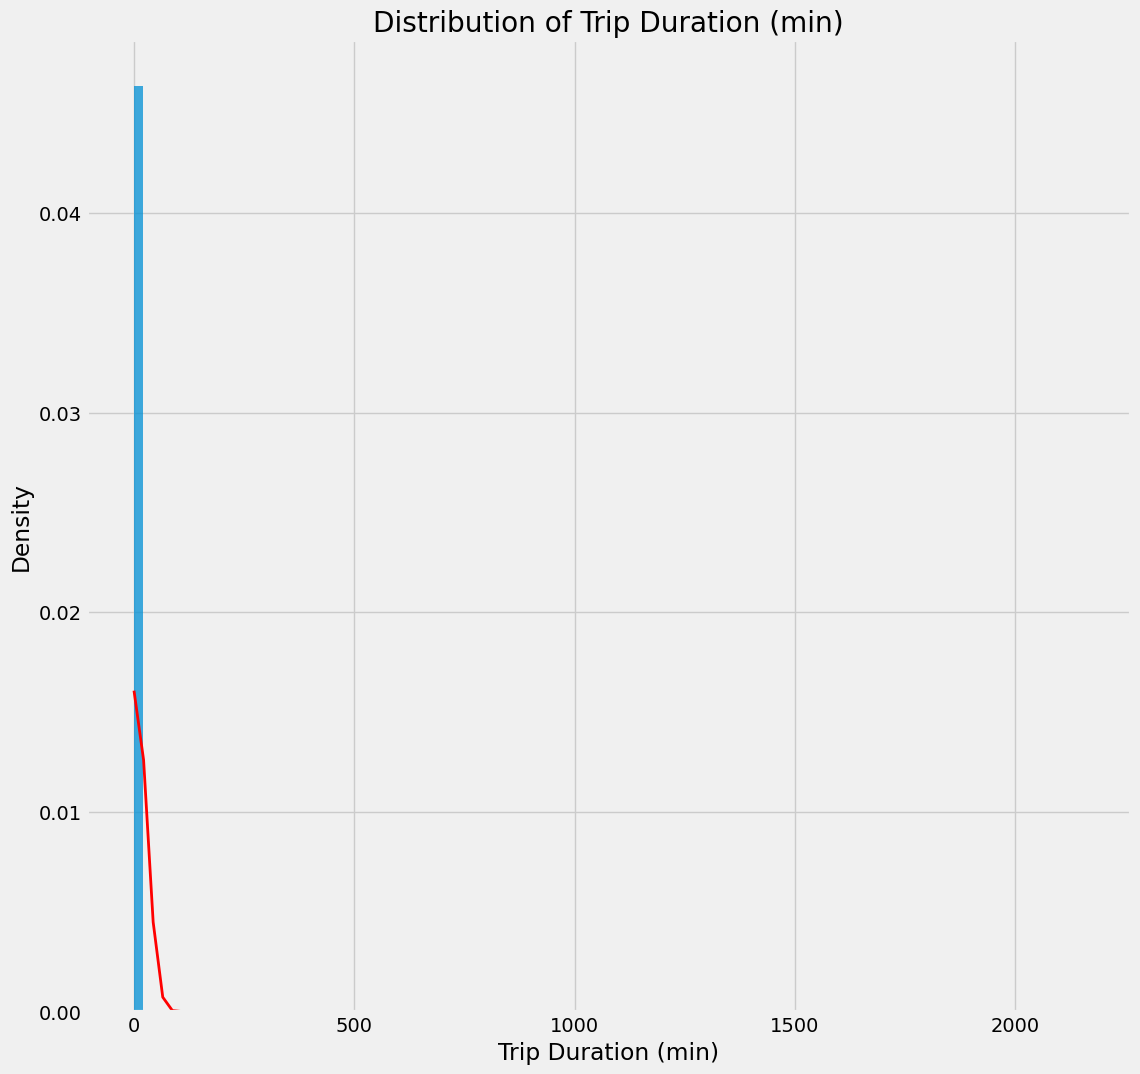

In [ ]:
import scipy.stats as stats

# Extract trip duration values as an array
trip_duration = trip_duration / np.timedelta64(1, 'm')

# Plot the distribution using histogram
plt.figure(figsize=(12, 12))
plt.hist(trip_duration, bins=100, density=True, alpha=0.75)

# Add labels and title
plt.xlabel('Trip Duration (min)')
plt.ylabel('Density')
plt.title('Distribution of Trip Duration (min)')

# Plot the probability density function (PDF)
x = np.linspace(np.min(trip_duration), np.max(trip_duration), 100)
mu, sigma = np.mean(trip_duration), np.std(trip_duration)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r-', lw=2)

# Show the plot
plt.show()


On visualising the plot in normal scale, we don't clearly see the less dense trips and also our trip_duration is right skewed, can apply log transformation and check if the distribution is normal.

#### Ploting the rides

Top 10 Pick-up Locations

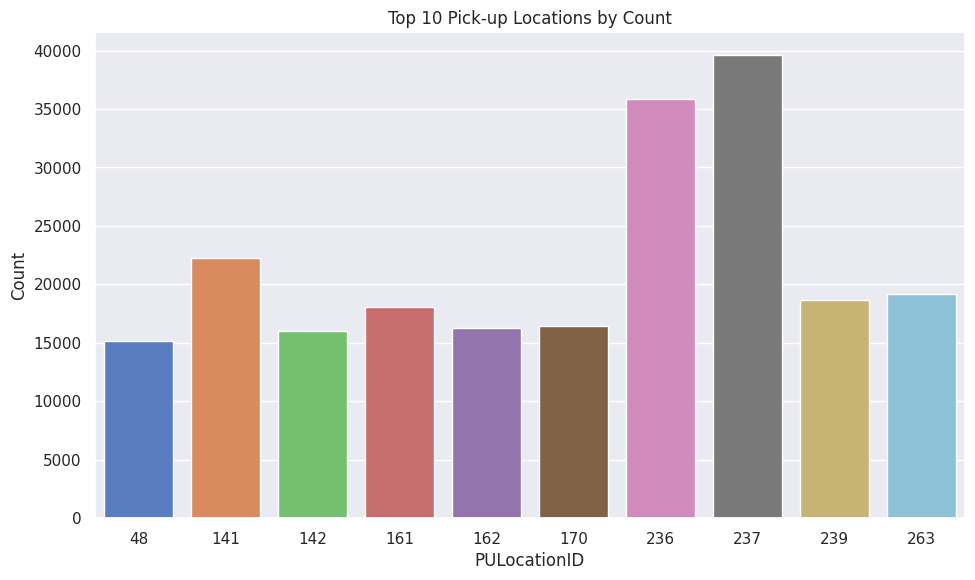

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 PULocationIDs by count in descending order
top_10_locations = taxi_data['PULocationID'].value_counts().head(10)

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values)

plt.xlabel('PULocationID')
plt.ylabel('Count')
plt.title('Top 10 Pick-up Locations by Count')

plt.show()




1.   237 - Upper East Side South - Manhattan
2.   236 - Upper East Side North - Manhattan
1.   141 - Lenox Hill West - Manhattan
1.   263 - Yorkville West - Manhattan
2.   239 - Upper West Side South - Manhattan
1.   161 - Midtown Center - Manhattan
1.   162 - Midtown East - Manhattan
1.   170 - Murray Hill - Manhattan
1.   142 - Lincoln Square East - Manhattan
1.   48  - Clinton East - Manhattan - Manhattan


**Most of the pickup loctions are based on Manhattan**












Top 10 Drop-off Locations

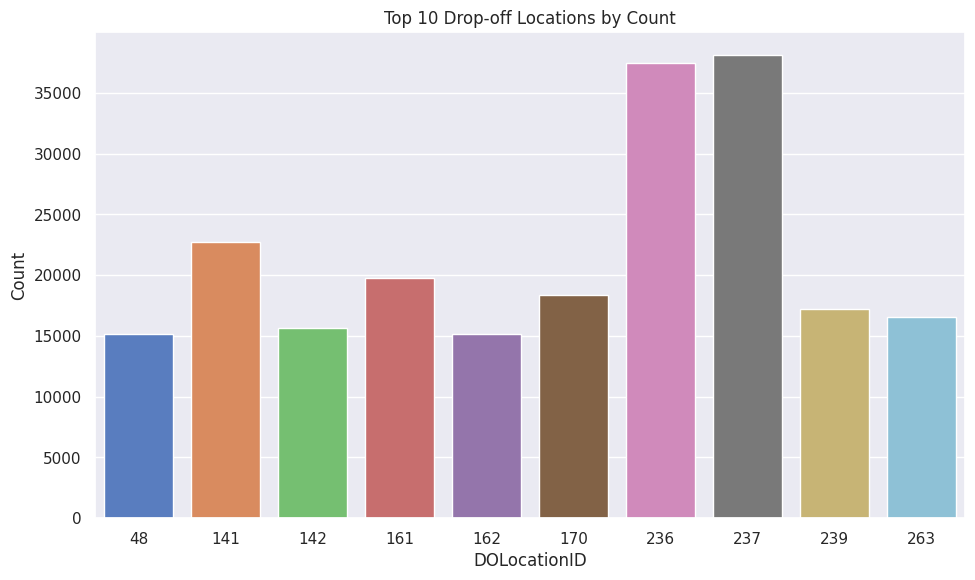

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'taxi_data' with a column 'PULocationID'

# Get the top 10 PULocationIDs by count in descending order
top_10_locations = taxi_data['DOLocationID'].value_counts().head(10)

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values)

plt.xlabel('DOLocationID')
plt.ylabel('Count')
plt.title('Top 10 Drop-off Locations by Count')

plt.show()




1.   237 - Upper East Side South - Manhattan
2.   236 - Upper East Side North - Manhattan
1.   141 - Lenox Hill West - Manhattan
1.   161 - Midtown Center - Manhattan
1.   170 - Murray Hill - Manhattan
2.   239 - Upper West Side South - Manhattan
1.   263 - Yorkville West - Manhattan
1.   162 - Midtown East - Manhattan
1.   142 - Lincoln Square East - Manhattan
1.   48  - Clinton East - Manhattan - Manhattan


**Most of the pickup loctions are based on Manhattan**












By plotting the pickup and dropoff coordinates can see the map of New York. It is evident from above plot that
1. Most of the journeys start and end at Manhattan.


### Categorical features

#### Vendors

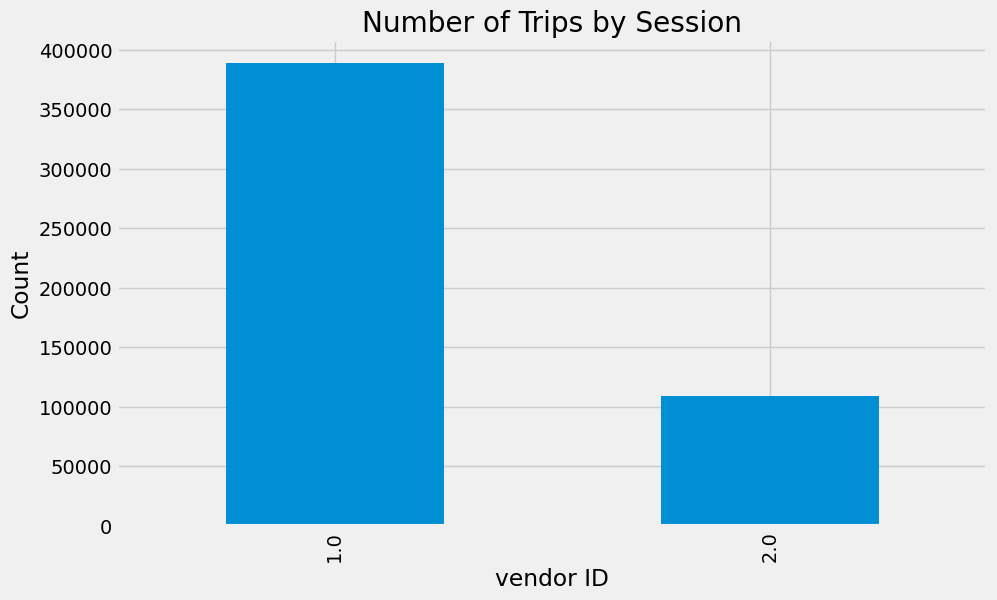

In [ ]:
# Plot by session
vendor = taxi_data['vendor_id'].value_counts()
vendor.plot(kind='bar', figsize=(10, 6))
plt.xlabel('vendor ID')
plt.ylabel('Count')
plt.title('Number of Trips by Session')
plt.show()

Only 2 vendors are there and out of them vendor 1 gets more number of rides

#### Store and forward flag

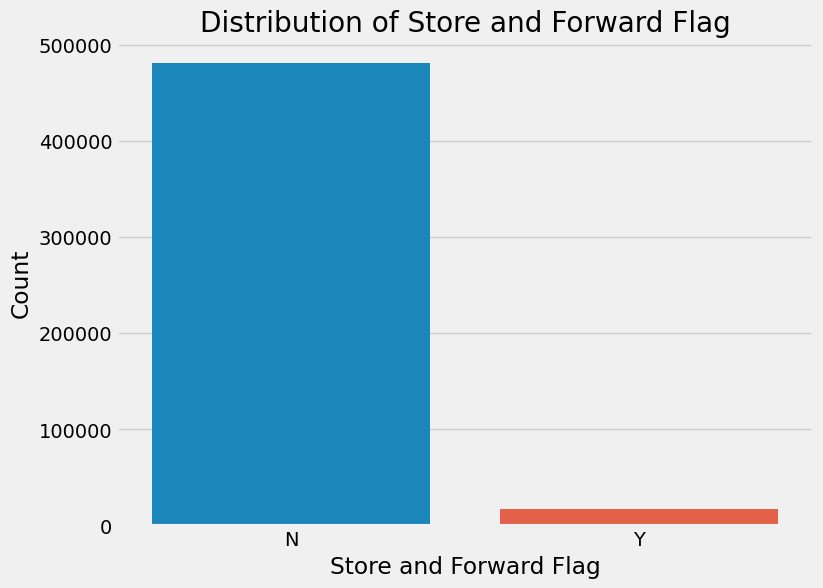

In [ ]:
# Plot the distribution using a countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=taxi_data, x='store_and_fwd_flag')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Count')
plt.title('Distribution of Store and Forward Flag')
plt.show()


Most of the the trip record was not held in vehicle memory before sending to the vendor.

#### Passenger count

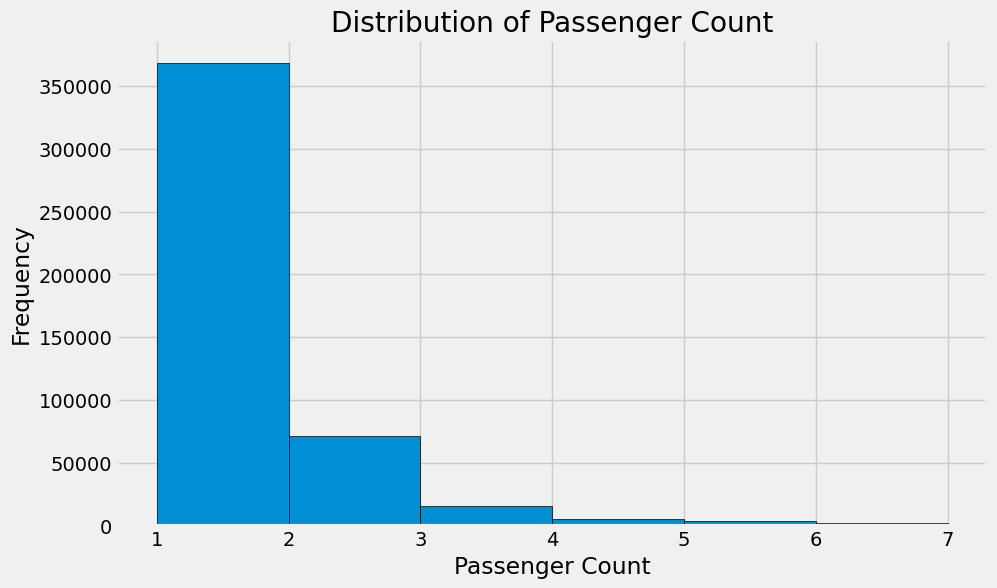

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of passenger count
plt.figure(figsize=(10, 6))
plt.hist(taxi_data['passenger_count'], bins=range(1, 8), edgecolor='black')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Count')
plt.xticks(range(1, 8))
plt.show()

From above plot can infer that
1. Most rides are single travel.
2. no outliers.

### Datetime features

#### Weekends vs Weekdays

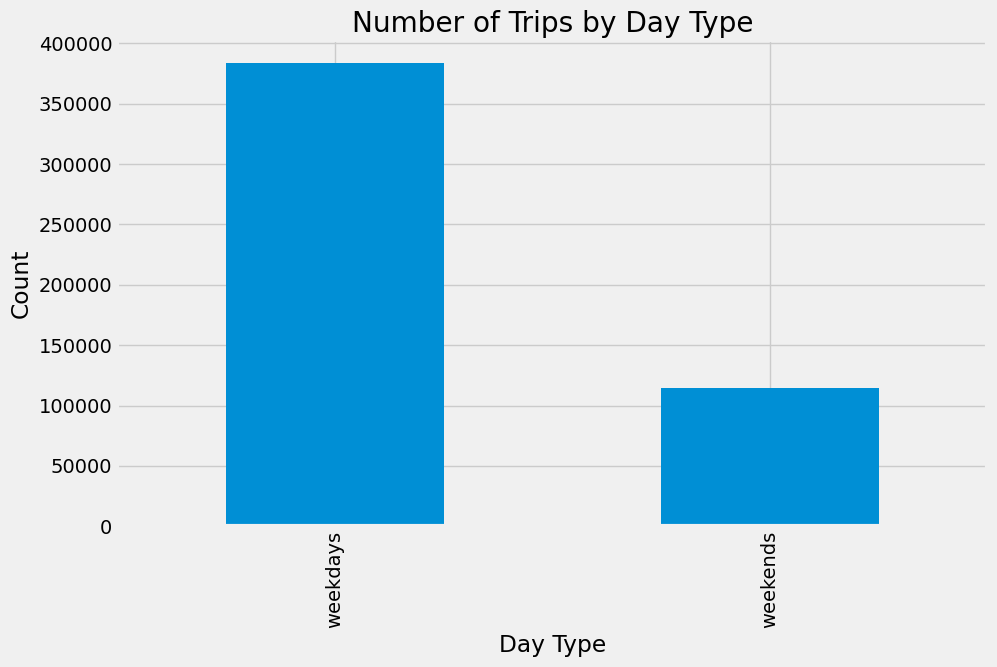

In [ ]:
# Plot by day type
day_type_counts = taxi_data['day_type'].value_counts()
day_type_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.title('Number of Trips by Day Type')
plt.show()

As expected number of rides in weekdays are more than the weekends which can be due to the working population

#### Day of week

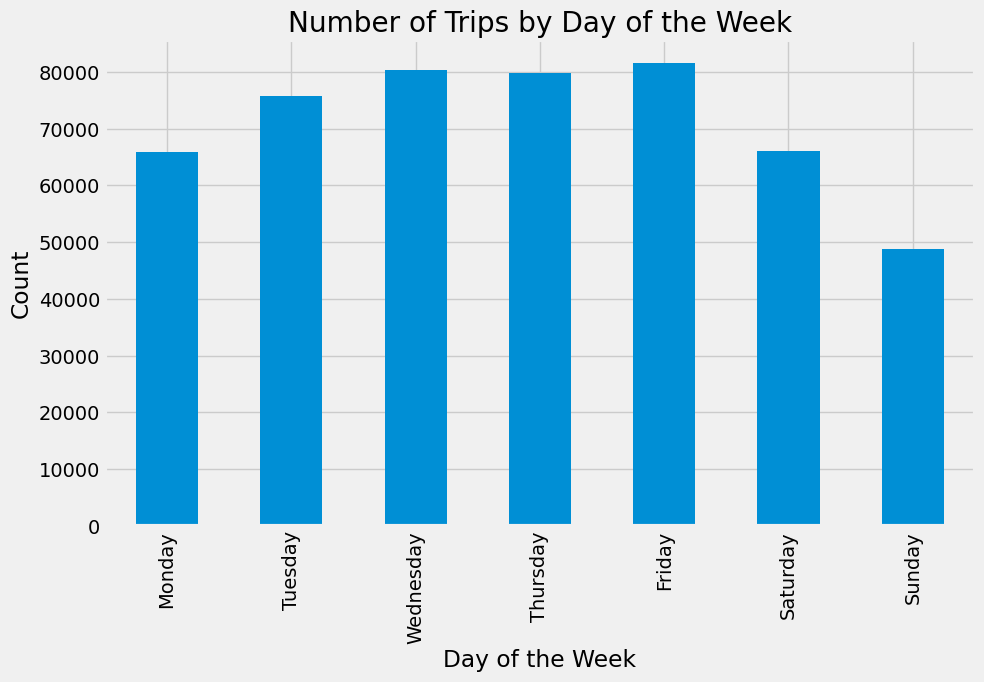

In [ ]:
# Plot by day of the week
day_of_week_counts = taxi_data.groupby('day_of_week').size()
day_of_week_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Number of Trips by Day of the Week')
plt.show()

We get the highest number of rides on friday

#### Hour of the day

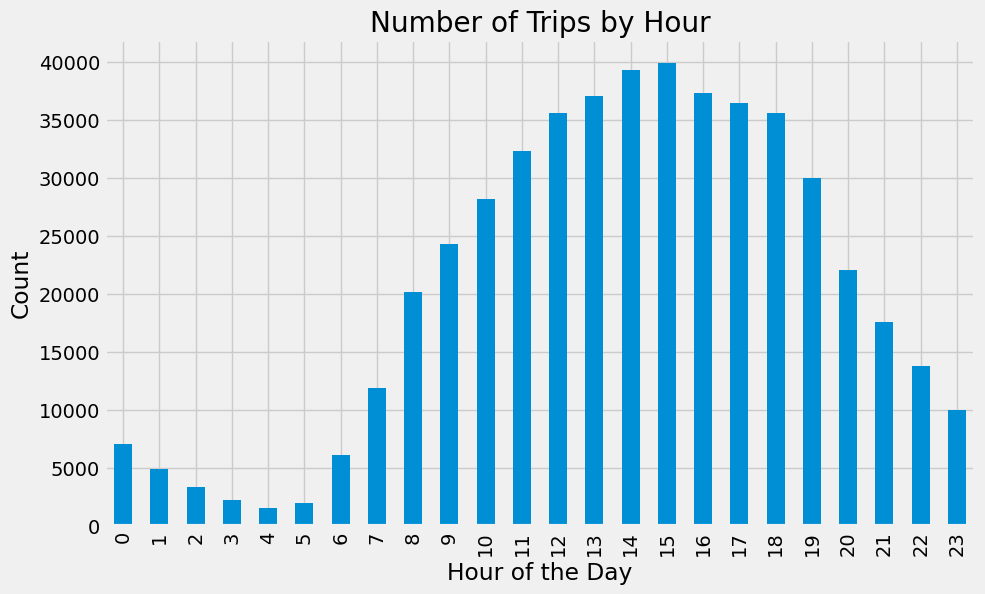

In [ ]:
# Plot by hour
hourly_counts = taxi_data.groupby('hour').size()
hourly_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Number of Trips by Hour')
plt.show()

From the above plot, can infer that,
1. Rides are more from 8am to 11pm.
2. Maximum rides are at 2pm and 3pm.
3. Number of rides are minimum at mid night

#### Part of the day

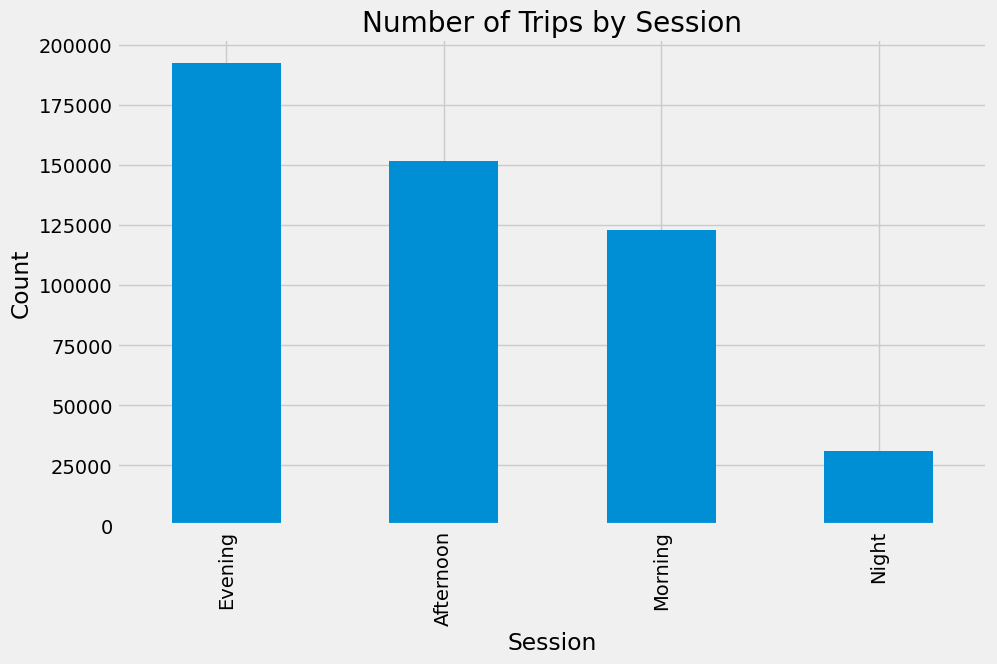

In [ ]:
# Plot by session
session_counts = taxi_data['Session'].value_counts()
session_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Session')
plt.ylabel('Count')
plt.title('Number of Trips by Session')
plt.show()

From the above plot, can infer that,
1. Rides are more in Evening.
3. Number of rides are minimum at mid night

## Analysing the variables - Multivariate analysis

#### Trip duration vs Trip distance

Since there are more outliers in Trip duration, visualising it directly doesn't give the whole picture of the relationship

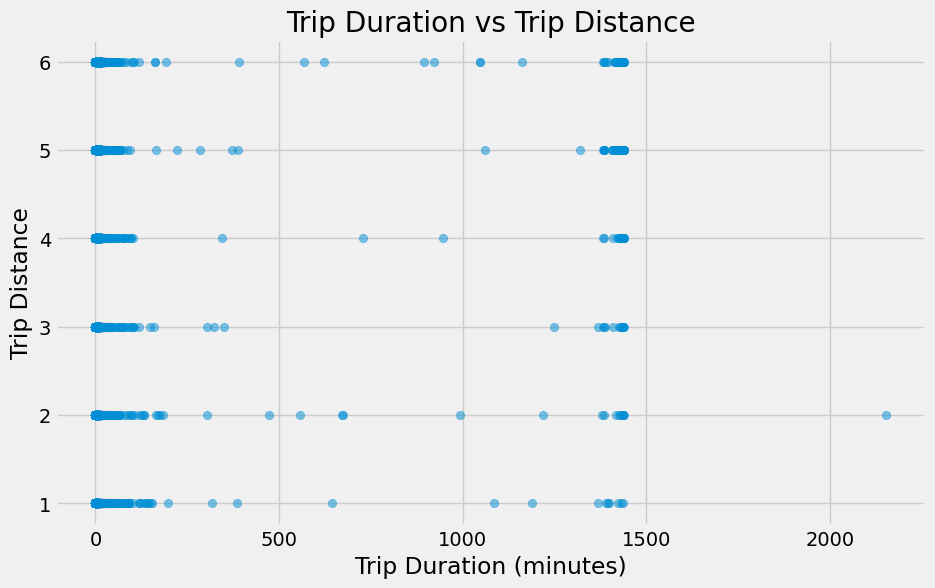

In [ ]:
# Convert trip duration to float (representing minutes)
trip_duration_minutes = taxi_data['trip_duration'].astype('timedelta64[m]').astype(float)

# Extract trip distance values
trip_distance = taxi_data['trip_distance']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(trip_duration_minutes, trip_distance, alpha=0.5)

# Add labels and title
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Trip Distance')
plt.title('Trip Duration vs Trip Distance')

# Show the plot
plt.show()

From the above plots can infer that as the distance increases, duration of the trip also increases. Since our trip is right skewed distribution, on checking with log transformed values, able to visualise the whole picture of the relationship.

But we have some 0 distance trips with more trip duration. Lets analyse those rides now

In [ ]:
taxi_data[taxi_data.trip_distance==0].head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,hour,day_of_week,day_type,Session,trip_duration(min)


In [ ]:
taxi_data[taxi_data.trip_distance==0].tail()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,hour,day_of_week,day_type,Session,trip_duration(min)


By looking at the ride details, can see that for all the 0 distance ride, dropoff time is more than pickup time. It can be due to 3 reasons.
1. Dropoff time is not recorded.
2. Taxi might have stuck in traffic jam and customer would have cancelled the ride.
3. Manual error.

#### Pickup and Dropoff locations

Can see the desnity of rides from the heatmap

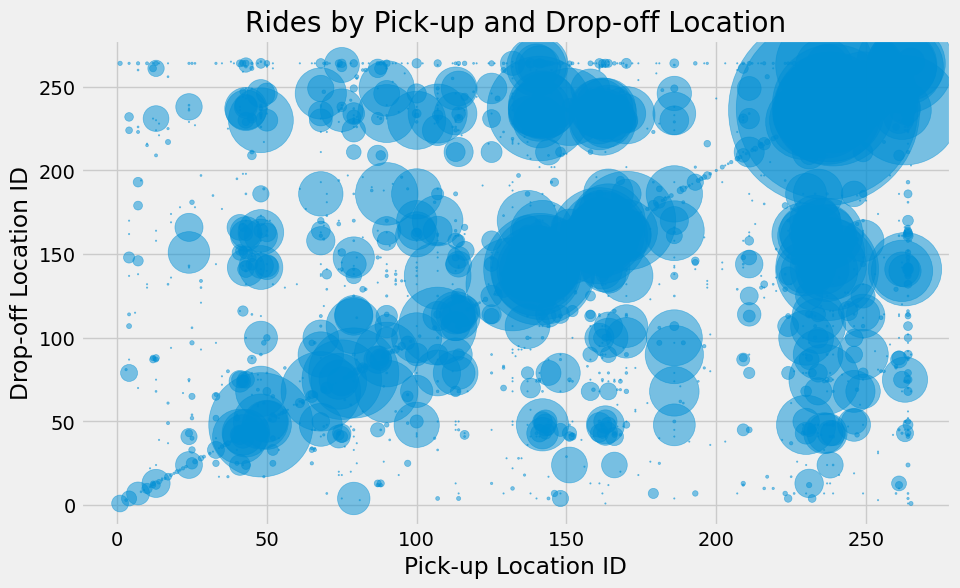

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'taxi_data' with columns 'PULocationID' and 'DOLocationID'

# Group the data by PULocationID and DOLocationID and count the number of rides
ride_counts = taxi_data.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='Ride_Count')

# Plot the rides using PULocationID and DOLocationID
plt.figure(figsize=(10, 6))
plt.scatter(ride_counts['PULocationID'], ride_counts['DOLocationID'], s=ride_counts['Ride_Count'], alpha=0.5)
plt.xlabel('Pick-up Location ID')
plt.ylabel('Drop-off Location ID')
plt.title('Rides by Pick-up and Drop-off Location')
plt.show()

### Trip duration vs Days based on vendors

Since there are some outliers, can visualise the trip duration column till 95th percentile to give some better idea about the distribution

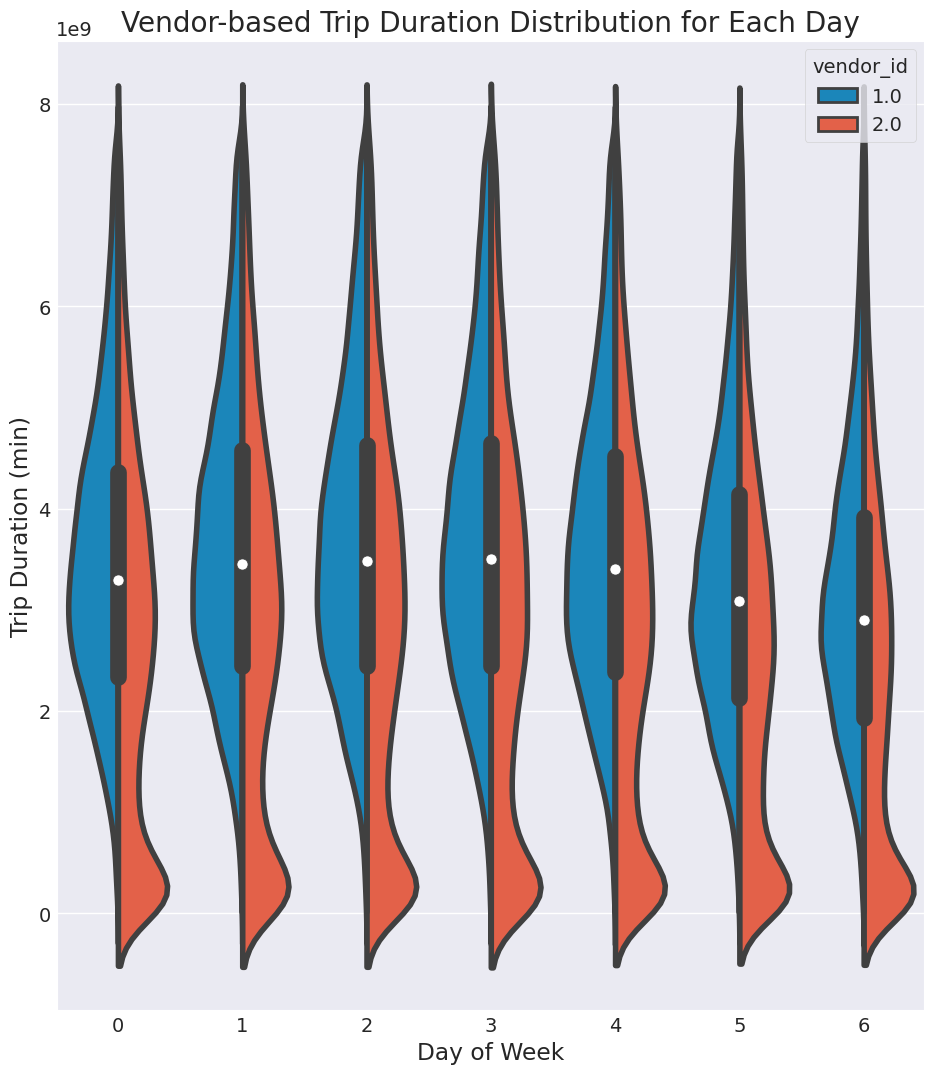

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'taxi_data' with columns 'vendor_id', 'day_of_week', and 'trip_duration(min)'

# Convert 'day_of_week' column to integers
taxi_data['day_of_week'] = taxi_data['day_of_week'].astype(int)

# Convert 'trip_duration(min)' column to numeric type
taxi_data['trip_duration(min)'] = pd.to_numeric(taxi_data['trip_duration(min)'], errors='coerce')

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10, 12))
sns.violinplot(data=taxi_data[taxi_data['trip_duration(min)'] <= taxi_data['trip_duration(min)'].quantile(0.95)],
               x='day_of_week', y='trip_duration(min)', hue='vendor_id', split=True)

ax.set_xlabel("Day of Week")
ax.set_ylabel("Trip Duration (min)")
ax.set_title("Vendor-based Trip Duration Distribution for Each Day")

plt.show()


From the above figure can infer that,
1. From the distribution, both the vendors has almost similar duration distribution in each day
2. Also for each day, duration between most number of rides have 5 to 10 mins duration with each vendor

Can verify the same with the lineplot

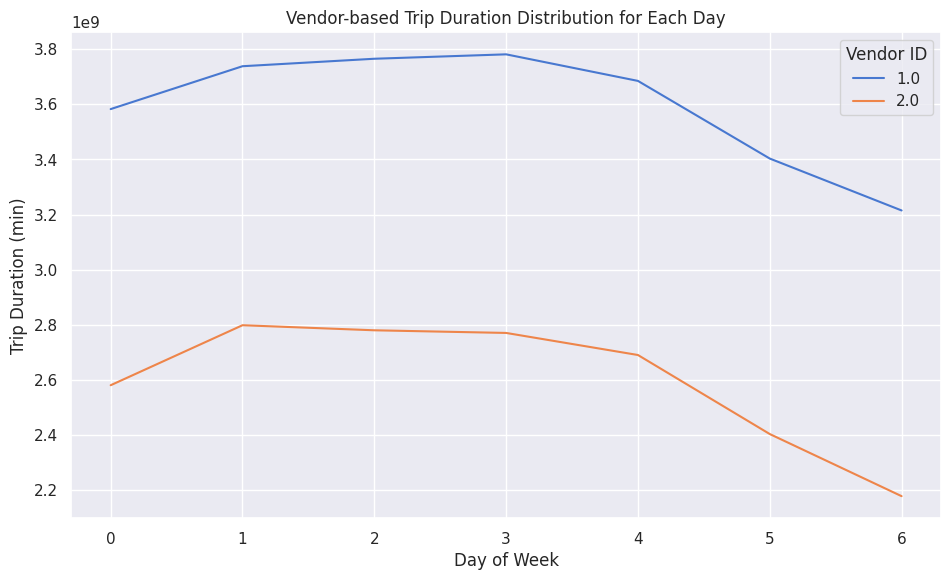

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'taxi_data' with columns 'vendor_id', 'day_of_week', and 'trip_duration(min)'

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=taxi_data[taxi_data['trip_duration(min)'] <= taxi_data['trip_duration(min)'].quantile(0.95)],
             x='day_of_week', y='trip_duration(min)', hue='vendor_id', ci=None)

plt.xlabel("Day of Week")
plt.ylabel("Trip Duration (min)")
plt.title("Vendor-based Trip Duration Distribution for Each Day")
plt.legend(title='Vendor ID')

plt.show()


From the above plot, its clear that both the vendors take almost similar time in all days except wednesday and thrusday

### Vendor based trip duration vs passenger_count

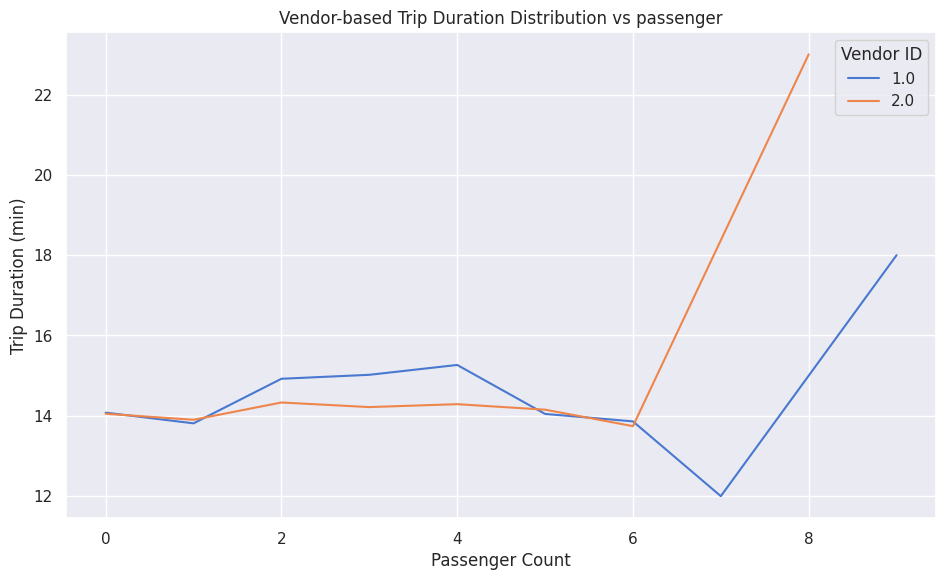

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=taxi_data[taxi_data['trip_duration'] <= taxi_data['trip_duration'].quantile(0.95)],
             x='passenger_count', y='hour', hue='vendor_id', ci=None)

plt.xlabel("Passenger Count")
plt.ylabel("Trip Duration (min)")
plt.title("Vendor-based Trip Duration Distribution vs passenger")
plt.legend(title='Vendor ID')

plt.show()


It can be concluded from the above plot that Vendor 2 took more rides than Vendor 1 carries more than six passengers.